# Example: Let's Build and Visualize a Stoichiometric Matrix as a Graph
This example will familiarize students with thinking about common Chemical Engineering things, e.g., reaction stoichiometry, in the context of `Graphs.` We'll load a reaction file, create a stoichiometric matrix $\mathbf{S}$, and then create a special adjacency matrix from $\mathbf{S}$.

### What is a stoichiometric matrix $\mathbf{S}$?
The stoichiometric matrix $\mathbf{S}$ is an $\mathcal{M}\times\mathcal{R}$ array, where $\mathcal{M}$ denotes the number of chemical species in the system, and $\mathcal{R}$ denotes the number of reactions in the system. The elements of the stoichiometric matrix $\sigma_{ij}\in\mathbf{S}$ are real numbers that describe the _net_ stoichiometric coefficient of chemical species $i$ in reaction $j$:
* A stoichiometric coefficient $\sigma_{ij}$ > 0 implies that species $i$ is __produced__ by reaction $j$
* A stoichiometric coefficient $\sigma_{ij}$  = 0 implies that species $i$ is __not connected__ to reaction $j$
* A stoichiometric coefficient $\sigma_{ij}$ < 0 implies that species $i$ is __consumed__ by reaction $j$

## Setup
This example may use external third-party packages. In the `Include.jl` file, we load our codes to access them in the notebook, set some required paths for this example, and load any required external packages.

In [1]:
include("Include.jl");

  Activating project at `~/Desktop/julia_work/CHEME-4800-5800-Examples-AY-2024/week-7/L7c`
  No Changes to `~/Desktop/julia_work/CHEME-4800-5800-Examples-AY-2024/week-7/L7c/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-4800-5800-Examples-AY-2024/week-7/L7c/Manifest.toml`
    Updating registry at `~/.julia/registries/General.toml`
  No Changes to `~/Desktop/julia_work/CHEME-4800-5800-Examples-AY-2024/week-7/L7c/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-4800-5800-Examples-AY-2024/week-7/L7c/Manifest.toml`


## 1. Load a Reaction File and Build a Stoichiometric Matrix
We have encoded a few chemical reaction networks as a list of comma-separated records. 
* Each reaction record has the fields: `name::String, forward-reaction::String, backward-reaction::String, reversible::Bool`. Let's look at an [example toy network](data/ToyNetwork.net).

We'll build a parser for this kind of reaction file. Specify the path to the reaction file in the `path_to_reaction_file` variable:

In [2]:
path_to_reaction_file = joinpath(_PATH_TO_DATA,"ToyNetwork.net");

Next, we pass the `path_to_reaction_file` (which points to our reaction file) to the `read_reaction_file` function, which builds a list of reaction information as a collection of `MyChemicalReactionModel` instances.
* The `read_reaction_file(...)` function takes the path to `path_to_reaction_file` as an argument, along with information about the record delimiter (a `,` in this case) and what the comment characters are. This function returns the `reactions` dictionary holding the reaction name as the `key` and `MyChemicalReactionModel` instances as the `values`.

In [24]:
reactions = read_reaction_file(path_to_reaction_file, comment="//")

Dict{String, MyChemicalReactionModel} with 7 entries:
  "v2" => MyChemicalReactionModel("v2", "B", "P", false)
  "b3" => MyChemicalReactionModel("b3", "P", "Px", true)
  "v1" => MyChemicalReactionModel("v1", "A1+x", "B+y", false)
  "b4" => MyChemicalReactionModel("b4", "C", "Cx", true)
  "b2" => MyChemicalReactionModel("b2", "A2", "A2x", true)
  "v3" => MyChemicalReactionModel("v3", "A2+y", "C+x", false)
  "b1" => MyChemicalReactionModel("b1", "A1", "A1x", true)

The `MyChemicalReactionModel` type is specified in the [src/Types.jl file](src/Types.jl), holds information for each reaction in the system of reactions. We use this information to construct an instance of `MyStoichiometricMatrixModel` using the `build(...)` function in [src/Factory.jl](src/Factory.jl)
* The `build(...)` function for the `MyStoichiometricMatrixModel` type takes the `reactions` dictionary and an extra argument; the `expand::Bool` argument tells the build process to split reversible reactions into forward and reversible component

In [25]:
S = build(MyStoichiometricMatrixModel, reactions, expand = true)

MyStoichiometricMatrixModel(["A1", "A1x", "A2", "A2x", "B", "C", "Cx", "P", "Px", "x", "y"], ["v1", "Rb1", "Rb2", "Fb3", "Rb3", "Rb4", "v3", "Fb1", "Fb2", "v2", "Fb4"], [-1.0 1.0 … 0.0 0.0; 0.0 -1.0 … 0.0 0.0; … ; -1.0 0.0 … 0.0 0.0; 1.0 0.0 … 0.0 0.0])

In [28]:
S.matrix

11×11 Matrix{Float64}:
 -1.0   1.0   0.0   0.0   0.0   0.0   0.0  -1.0   0.0   0.0   0.0
  0.0  -1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0
  0.0   0.0   1.0   0.0   0.0   0.0  -1.0   0.0  -1.0   0.0   0.0
  0.0   0.0  -1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0
  1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  -1.0   0.0
  0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0   0.0   0.0  -1.0
  0.0   0.0   0.0   0.0   0.0  -1.0   0.0   0.0   0.0   0.0   1.0
  0.0   0.0   0.0  -1.0   1.0   0.0   0.0   0.0   0.0   1.0   0.0
  0.0   0.0   0.0   1.0  -1.0   0.0   0.0   0.0   0.0   0.0   0.0
 -1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0
  1.0   0.0   0.0   0.0   0.0   0.0  -1.0   0.0   0.0   0.0   0.0

### Check: Do the entries of the stoichiometric matrix make sense?

In [6]:
reactions["v1"].reactants

"A1+x"

In [7]:
index_species = findall(x->x < 0.0, S.matrix[:,1])
[S.species[index_species] S.matrix[index_species,1]]

2×2 Matrix{Any}:
 "A1"  -1.0
 "x"   -1.0

## 2. Build the Reaction Adjacency Graph (RAG)
Now that we have the stoichiometric matrix, to compute the graph representation, we need to construct an `adjacency matrix`. We do this by first constructing the `binary` representation of the stoichiometric matrix $\mathbf{B}$, which is formed by replacing all non-zero elements of $\mathbf{S}$ with `1`.
* We use the `binary_stoichiometric_matrix(...)` function in the [src/Stochiometry.jl file](src/Stoichiometry.jl) to compute the binary stoichiometric matrix $\mathbf{B}$:

In [8]:
B = binary_stoichiometric_matrix(S.matrix)

11×11 Matrix{Int64}:
 1  1  0  0  0  0  0  1  0  0  0
 0  1  0  0  0  0  0  1  0  0  0
 0  0  1  0  0  0  1  0  1  0  0
 0  0  1  0  0  0  0  0  1  0  0
 1  0  0  0  0  0  0  0  0  1  0
 0  0  0  0  0  1  1  0  0  0  1
 0  0  0  0  0  1  0  0  0  0  1
 0  0  0  1  1  0  0  0  0  1  0
 0  0  0  1  1  0  0  0  0  0  0
 1  0  0  0  0  0  1  0  0  0  0
 1  0  0  0  0  0  1  0  0  0  0

The reaction adjanceny graph $\mathbf{A}$ is defined as $\mathbf{A}=\mathbf{B}^{T}\cdot\mathbf{B}$ where the superscript `T` denotes the transpose.
* The `diagonal` elements of $\mathbf{A}$ denoted as $a_{ii}$, describe the `degree` of each reaction, i.e., the number of compounds in the reaction network that a particular reaction is involved with
* The `off-diagonal` elements, denoted as $a_{ij}\,i\neq{j}$, describe the number of shared compounds between reactions $i$ and $j$ in the reaction network

In [9]:
A = transpose(B)*B

11×11 Matrix{Int64}:
 4  1  0  0  0  0  2  1  0  1  0
 1  2  0  0  0  0  0  2  0  0  0
 0  0  2  0  0  0  1  0  2  0  0
 0  0  0  2  2  0  0  0  0  1  0
 0  0  0  2  2  0  0  0  0  1  0
 0  0  0  0  0  2  1  0  0  0  2
 2  0  1  0  0  1  4  0  1  0  1
 1  2  0  0  0  0  0  2  0  0  0
 0  0  2  0  0  0  1  0  2  0  0
 1  0  0  1  1  0  0  0  0  2  0
 0  0  0  0  0  2  1  0  0  0  2

### Visualize the `RAG`
If we have an adjacency matrix, we can build (and visualize) a graph! Let's invoke the `buy versus build` argument and use some excellent third-party packages for this: 
* The [Graphs.jl package](https://github.com/JuliaGraphs/Graphs.jl) is a great third-party package for working with graph-type objects. It already has better implementations of most of what we have discussed, e.g., BFS, BFS, Dijkstra algorithm, etc.
* The [Karnak.jl package](https://github.com/cormullion/Karnak.jl) is a super cool package for graph visualizations. It has a bit of a learning curve, but you can do some amazing things with it.

To construct a graph `g,` we need to build an `edge list` and then pass that `edge list` to a constructor method for the type of graph we want to build, e.g., undirected, directed, weighted, or unweighted.

In [13]:
edge_list = Array{Tuple{Int,Int},1}();
number_of_rows = length(A[:,1]); # we could use size(A,1) as well
for i ∈ 1:number_of_rows
    index_connections = findall(x-> x!==0, A[i,:]);
    for j ∈ index_connections
        if (i ≠ j)
            push!(edge_list, (i,j))
        end
    end
end
E = Edge.(edge_list);

We'll visualize the `RAG` as an unweighted, undirected graph:

In [16]:
g = SimpleGraph(E); # use the Graph.jl package

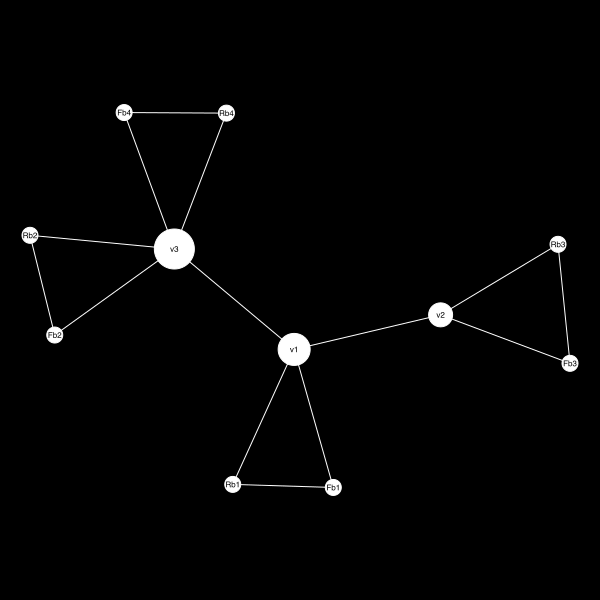

In [21]:
@drawsvg begin
    fontsize(8)
    background("black")
    sethue("white")
    drawgraph(g, layout=stress, 
    vertexlabels = (v) -> S.reactions[v],
    edgelabels = :none, edgecurvature=0, 
    vertexshapesizes =  4.0*[Graphs.degree(g, v) for v in Graphs.vertices(g)])
end 600 600